In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import dotenv
import numpy as np
import os

In [2]:
os.getcwd()

'C:\\Users\\dwagn\\git\\projects\\spotify_proj'

In [3]:
os.chdir('C:\\Users\\dwagn\\Desktop')
dotenv.load_dotenv()
CLIENT_ID = os.getenv('spotify-client-id')
CLIENT_SECRET = os.getenv('spotify-client-secret')
os.chdir('C:\\Users\\dwagn\\git\\projects')

In [4]:
AUTH_URL = 'https://accounts.spotify.com/api/token'


auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET
})

auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']

if auth_response.status_code == 200:
    print ('Success!')
else:
    print ('API access rejected')
    
headers = {'Authorization': 'Bearer {}'.format(access_token)}

url = 'https://api.spotify.com/v1/'

Success!


In [5]:
# Paste artist's share link to get the artist_id
# 'https://open.spotify.com/artist/6py4uFIC7T6RdrZnH6hFYJ?si=EJXirCwjR-2y8iw8oBwYjQ'

while True:
    artist_share_url = input('Paste artist spotify share link: ')
    if artist_share_url == '':
        print('bypassing')
        artist_id = ''
        break
    try:
        artist_id = artist_share_url.split('/')[4].split('?')[0]
        int(len(artist_id)) > 0
        break
    except:
        print('invalid URL')
print(artist_id)

Paste artist spotify share link:  https://open.spotify.com/artist/41Q0HrwWBtuUkJc7C1Rp6K?si=1CP1nlNoR9qEUumdHBcs6A


41Q0HrwWBtuUkJc7C1Rp6K


In [6]:
'''
Sample artist ids:
artist_id = '6py4uFIC7T6RdrZnH6hFYJ' # Ballyhoo!
artist_id = '41Q0HrwWBtuUkJc7C1Rp6K' # 311
'''

# pull albums
albums = requests.get(url + 'artists/' + artist_id + '/albums', 
                 headers=headers, 
                 params={'include_groups': 'album', 'limit': 50}).json()

In [7]:
album_names_dates = {}
for album in albums['items']:
    album_names_dates[album['name']] = album['release_date']

In [8]:
artist_name = requests.get(url + 'artists/' + artist_id, headers=headers).json()['name']
print('Successfully accessed {}'.format(artist_name))

Successfully accessed 311


In [9]:
# checks for duplicate albums
# sometimes there are different track names (etc. censored or not) on each album
albs_added = []
to_remove = []

for i in range(len(albums['items'])):
    alb_name = albums['items'][i]['name']
    if alb_name in albs_added:
        to_remove.append(i)
    albs_added.append(alb_name)

In [10]:
%%time
track_info = []
repeat_detection = []
iter = 0

for i in albums['items']:
    
    if iter not in to_remove:

        r = requests.get(url + 'albums/' + i['id'] + '/tracks', 
            headers=headers)
        tracks = r.json()['items']

        for track in tracks:
            detailsr = requests.get(url + 'audio-features/' + track['id'], headers=headers).json()

            # combine with album info
            detailsr.update({
                'track_name': track['name'],
                'album_name': i['name'],
                'album_id': i['id'],
                'release_date': i['release_date']
            })

            track_info.append(detailsr)
        print('{} added...'.format(i['name']))
        
    iter += 1
        


Mardi Gras 2020 (Live) added...
Voyager (Instrumentals) added...
Voyager added...
MOSAIC added...
With the Unity Orchestra - Live from New Orleans - 311 Day 2014 added...
Stereolithic added...
Universal Pulse added...
Uplifter added...
Don't Tread On Me added...
Evolver added...
From Chaos added...
Soundsystem added...
311 Live added...
Transistor added...
311 added...
Grassroots added...
Music added...
Wall time: 46.6 s


In [11]:
df = pd.DataFrame(track_info)
df.release_date = pd.to_datetime(df.release_date)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,album_name,album_id,release_date
0,0.343,0.806,1,-11.353,0,0.0936,0.000019,0.000049,0.490,0.277,...,38znMaMurMhYmgYvMDQotf,spotify:track:38znMaMurMhYmgYvMDQotf,https://api.spotify.com/v1/tracks/38znMaMurMhY...,https://api.spotify.com/v1/audio-analysis/38zn...,248000,4,Beautiful Disaster - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15
1,0.466,0.765,1,-11.978,1,0.1050,0.001130,0.000000,0.442,0.456,...,6P7geqcpl7VcD3eFmKTAIR,spotify:track:6P7geqcpl7VcD3eFmKTAIR,https://api.spotify.com/v1/tracks/6P7geqcpl7Vc...,https://api.spotify.com/v1/audio-analysis/6P7g...,232750,4,All Mixed Up - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15
2,0.544,0.881,1,-9.936,1,0.0782,0.013800,0.000130,0.433,0.588,...,3T8PmznIDAnGTzd3PltUUP,spotify:track:3T8PmznIDAnGTzd3PltUUP,https://api.spotify.com/v1/tracks/3T8PmznIDAnG...,https://api.spotify.com/v1/audio-analysis/3T8P...,168084,4,Silver - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15
3,0.432,0.857,7,-11.565,1,0.0676,0.000786,0.000077,0.333,0.430,...,3V07MqrFuz5dJm6baCWz8m,spotify:track:3V07MqrFuz5dJm6baCWz8m,https://api.spotify.com/v1/tracks/3V07MqrFuz5d...,https://api.spotify.com/v1/audio-analysis/3V07...,228000,4,Come Original - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15
4,0.575,0.854,7,-11.271,1,0.0515,0.003940,0.000045,0.221,0.476,...,50qMMcQDAukXhh07xBKCh7,spotify:track:50qMMcQDAukXhh07xBKCh7,https://api.spotify.com/v1/tracks/50qMMcQDAukX...,https://api.spotify.com/v1/audio-analysis/50qM...,138500,4,Gap - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15


In [12]:
# double-check for duplicate track values

for name in df.album_name.unique():
    track_counts = df[df['album_name'] == name]['track_name'].value_counts()
    if all(v == 1 for v in track_counts) == False:
        print(f'Warning: duplicates in: {name}')

In [13]:
df['release_date'] = pd.to_datetime(df['release_date'])

# move last couple columns to the front
cols = df.columns.tolist()
cols = cols[-4:] + cols[:-4]
df = df[cols]

In [14]:
# Shorten long album names for graphing
for name in df['album_name']:
    if len(name) > 25:
        short_name = name[0:25]
        df = df.replace(name, short_name)

In [15]:
# remove tracks with na values, if any
# can't simply dropna(), since there is an error column of NAs >:(

def removeErrors(dataframe):
    na_tracks = []
    for track in dataframe[~dataframe['error'].isna()]['track_name']: 
        na_tracks.append(track)
    print('Removing: ', na_tracks)
    dataframe = dataframe[dataframe['error'].isna()].drop('error', 1) 

if ('error' in df.columns): 
    removeErrors(df)

In [16]:
df['duration_mins'] = (df['duration_ms']/60000).round(2)

def toMinsSecs(time):
    minutes = int(time)
    seconds = int((time - minutes) * 60)
    if seconds < 10:
        seconds = str(seconds).zfill(2) # adds zeros before single seconds
    full = '{}:{}'.format(minutes, seconds)
    return full
df['duration_full'] = df['duration_mins'].map(lambda x: toMinsSecs(x))
df.head(5)

,track_name,album_name,album_id,release_date,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,duration_mins,duration_full
0,Beautiful Disaster - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.343,0.806,1,-11.353,0,0.0936,...,169.943,audio_features,38znMaMurMhYmgYvMDQotf,spotify:track:38znMaMurMhYmgYvMDQotf,https://api.spotify.com/v1/tracks/38znMaMurMhY...,https://api.spotify.com/v1/audio-analysis/38zn...,248000,4,4.13,4:07
1,All Mixed Up - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.466,0.765,1,-11.978,1,0.1050,...,183.889,audio_features,6P7geqcpl7VcD3eFmKTAIR,spotify:track:6P7geqcpl7VcD3eFmKTAIR,https://api.spotify.com/v1/tracks/6P7geqcpl7Vc...,https://api.spotify.com/v1/audio-analysis/6P7g...,232750,4,3.88,3:52
2,Silver - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.544,0.881,1,-9.936,1,0.0782,...,96.965,audio_features,3T8PmznIDAnGTzd3PltUUP,spotify:track:3T8PmznIDAnGTzd3PltUUP,https://api.spotify.com/v1/tracks/3T8PmznIDAnG...,https://api.spotify.com/v1/audio-analysis/3T8P...,168084,4,2.80,2:47
3,Come Original - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.432,0.857,7,-11.565,1,0.0676,...,187.884,audio_features,3V07MqrFuz5dJm6baCWz8m,spotify:track:3V07MqrFuz5dJm6baCWz8m,https://api.spotify.com/v1/tracks/3V07MqrFuz5d...,https://api.spotify.com/v1/audio-analysis/3V07...,228000,4,3.80,3:47
4,Gap - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.575,0.854,7,-11.271,1,0.0515,...,106.998,audio_features,50qMMcQDAukXhh07xBKCh7,spotify:track:50qMMcQDAukXhh07xBKCh7,https://api.spotify.com/v1/tracks/50qMMcQDAukX...,https://api.spotify.com/v1/audio-analysis/50qM...,138500,4,2.31,2:18


In [17]:
# subset by album
by_album = df.groupby('album_name').agg({'danceability':'mean',
                                         'energy':'mean',
                                         'loudness':'mean',
                                         'speechiness':'mean',
                                         'acousticness':'mean',
                                         'instrumentalness':'mean',
                                         'liveness':'mean',
                                         'valence':'mean',
                                         'tempo':'mean',
                                         'time_signature':'mean',
                                         'duration_ms':'sum',
                                         'duration_mins':'sum'}) \
                                    .round(3) \
                                    .reset_index() \
                                    
by_album.rename({'time_signature' : 'average_time_signature'})

,album_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,duration_mins
0,311,0.630,0.788,-7.142,0.058,0.012,0.000,0.258,0.656,115.734,4.000,2378452,39.64
1,311 Live,0.440,0.907,-6.271,0.124,0.040,0.008,0.925,0.311,130.326,3.929,3367134,56.12
2,Don't Tread On Me,0.593,0.838,-6.199,0.059,0.004,0.000,0.154,0.654,153.986,4.000,2246653,37.44
3,Evolver,0.593,0.712,-9.363,0.056,0.089,0.080,0.150,0.565,135.011,4.000,2474947,41.26
4,From Chaos,0.577,0.837,-6.480,0.068,0.045,0.002,0.089,0.627,150.110,4.000,2396479,39.95
5,Grassroots,0.628,0.790,-8.663,0.113,0.030,0.002,0.186,0.681,123.388,4.000,2711386,45.20
6,MOSAIC,0.548,0.878,-6.781,0.086,0.054,0.000,0.228,0.598,145.011,4.000,3641238,60.69
7,Mardi Gras 2020 (Live),0.445,0.751,-11.090,0.063,0.005,0.103,0.382,0.329,138.343,4.000,4606209,76.78
8,Music,0.665,0.888,-7.125,0.112,0.003,0.001,0.115,0.611,126.446,3.917,2777402,46.31
9,Soundsystem,0.625,0.878,-6.041,0.065,0.036,0.011,0.148,0.682,127.929,4.000,2803986,46.74


In [18]:
# remove extra/repeated albums
# for repeat albums, go through and pick shortest album

albs_to_keep = {}
for name in by_album['album_name']:
    trim_name = name.split('(')[0].strip()
    alb_len = len(df[df['album_name'] == '{}'.format(name)])
    print(trim_name,':',alb_len)
    for i in albs_to_keep.keys():
        if (name[0:5] in i) & (alb_len <= albs_to_keep[i]):
            albs_to_keep[i] = 0
    albs_to_keep[name] = alb_len
albs_to_keep = {x:y for x,y in albs_to_keep.items() if y != 0}

by_album = by_album[by_album['album_name'].isin(albs_to_keep)].reset_index(drop=True)

311 : 14
311 Live : 14
Don't Tread On Me : 11
Evolver : 12
From Chaos : 12
Grassroots : 14
MOSAIC : 17
Mardi Gras 2020 : 20
Music : 12
Soundsystem : 13
Stereolithic : 15
Transistor : 20
Universal Pulse : 8
Uplifter : 12
Voyager : 13
Voyager : 13
With the Unity Orchestra : 9


[Text(0, 0, 'With the Unity Orchestra '),
 Text(1, 0, 'Universal Pulse'),
 Text(2, 0, "Don't Tread On Me"),
 Text(3, 0, '311'),
 Text(4, 0, 'From Chaos'),
 Text(5, 0, 'Evolver'),
 Text(6, 0, 'Voyager (Instrumentals)'),
 Text(7, 0, 'Grassroots'),
 Text(8, 0, 'Music'),
 Text(9, 0, 'Soundsystem'),
 Text(10, 0, 'Uplifter'),
 Text(11, 0, 'Stereolithic'),
 Text(12, 0, '311 Live'),
 Text(13, 0, 'Transistor'),
 Text(14, 0, 'MOSAIC'),
 Text(15, 0, 'Mardi Gras 2020 (Live)')]

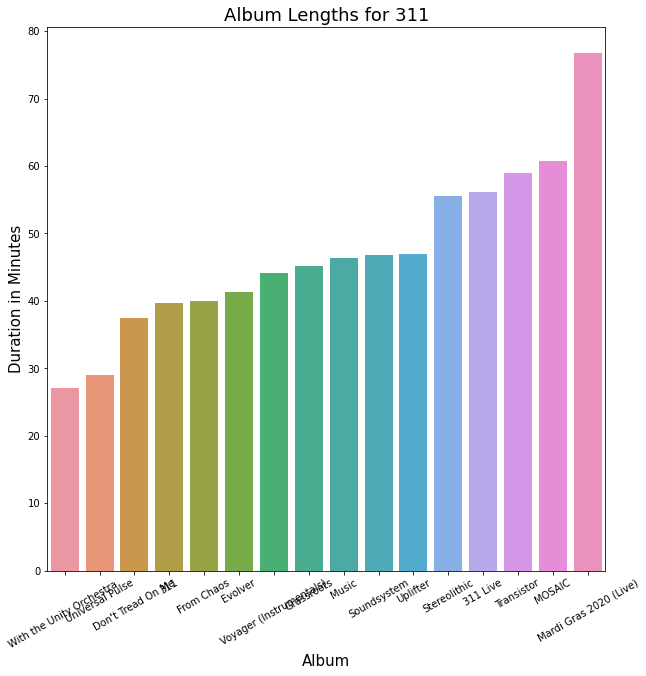

In [19]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=by_album, 
                 x='album_name', 
                 y='duration_mins',
                order = by_album.sort_values('duration_mins').album_name)
plt.xlabel("Album", size=15)
plt.ylabel("Duration in Minutes", size=15)
plt.title("Album Lengths for {artist}".format(artist = artist_name), size=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

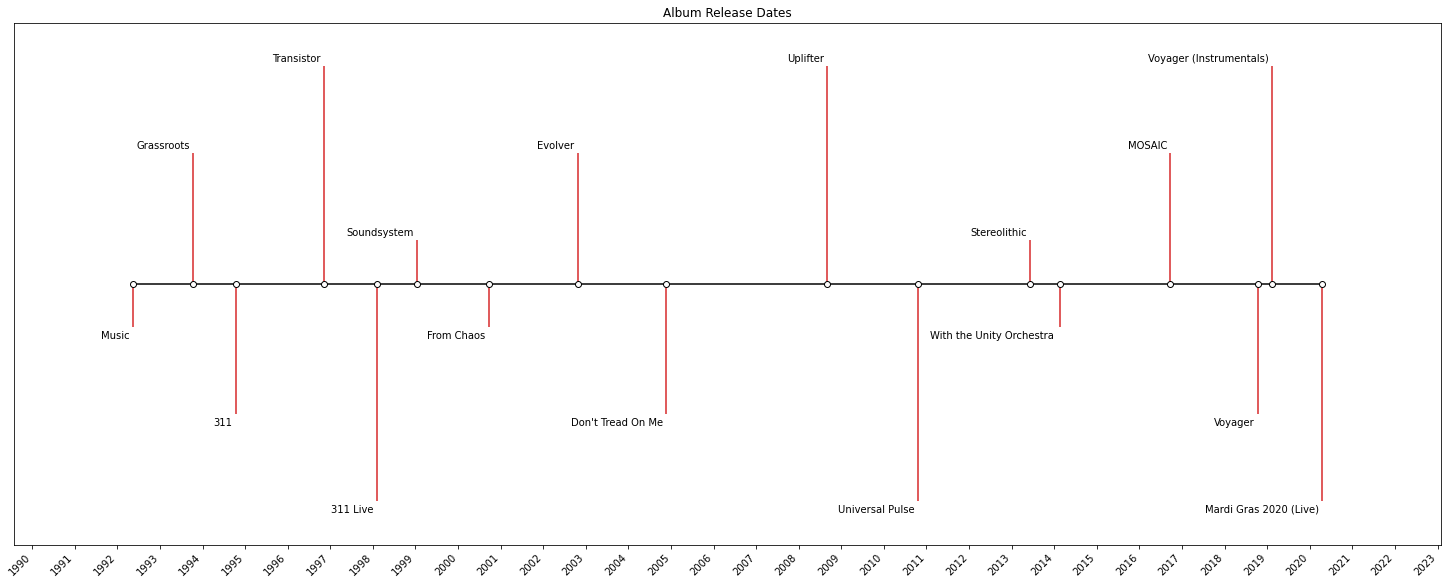

In [20]:
dates = df.release_date.unique()
names = df.album_name.unique()
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

fig, ax = plt.subplots(figsize=(20, 8), constrained_layout=True)
ax.set(title='Album Release Dates')
ax.vlines(dates, 0, levels, color='tab:red')
ax.plot(dates, np.zeros_like(dates), '-o',
        color='k', markerfacecolor='w')

for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")
    
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12)) # by year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right"); # semicolon stopping label output

ax.margins(y=0.1, x=0.1)
ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
corr_mat = by_album.corr(method='pearson').round(2)
sorted_mat = corr_mat.unstack().sort_values() \
             [:-(len(by_album.columns))-1] \
             [::2]
sorted_mat = sorted_mat.sort_values(ascending=False)
top_5_corr = sorted_mat.head(5)
bottom_5_corr = sorted_mat.tail(5)
print('Top 5 positive correlations:\n{}\n\nTop 5 negative correlations:\n{}' \
      .format(top_5_corr, bottom_5_corr))

Top 5 positive correlations:
danceability    valence         0.85
energy          loudness        0.83
time_signature  acousticness    0.69
valence         loudness        0.52
energy          speechiness     0.51
dtype: float64

Top 5 negative correlations:
loudness        time_signature   -0.58
speechiness     time_signature   -0.68
time_signature  speechiness      -0.68
liveness        danceability     -0.76
                valence          -0.82
dtype: float64


In [22]:
sorted_mat

danceability    valence           0.85
energy          loudness          0.83
time_signature  acousticness      0.69
valence         loudness          0.52
energy          speechiness       0.51
                                  ... 
loudness        time_signature   -0.58
speechiness     time_signature   -0.68
time_signature  speechiness      -0.68
liveness        danceability     -0.76
                valence          -0.82
Length: 65, dtype: float64

In [23]:
# messy attributes

def graphTopCorrs(signum, idx11, idx12, idx21, idx22, pallette='Set1'):
    var1 = str(signum[idx11:idx12]).split()[0]
    var2 = str(signum[idx21:idx22]).split()[1]
    
    plt.figure(figsize=(10, 10))
    plt.title("{var1} vs. {var2} for {artist} (by album)".format(var1 = var1,
                                                      var2 = var2,
                                                      artist = artist_name), size=18)
    plt.tight_layout()
    ax = sns.scatterplot(data=by_album, 
                     x=var1, 
                     y=var2,
                     s=1000,
                     marker='o',
                     hue='album_name',
                     palette=pallette)
    sns.set_style("ticks")
    plt.xlabel(var1, size=15)
    plt.ylabel(var2, size=15)
    
    h,labs = ax.get_legend_handles_labels()

    ax.legend(h[1:len(album_names_dates)+1], 
              labs[1:int(len(album_names_dates))+1], loc='best', title='Albums')


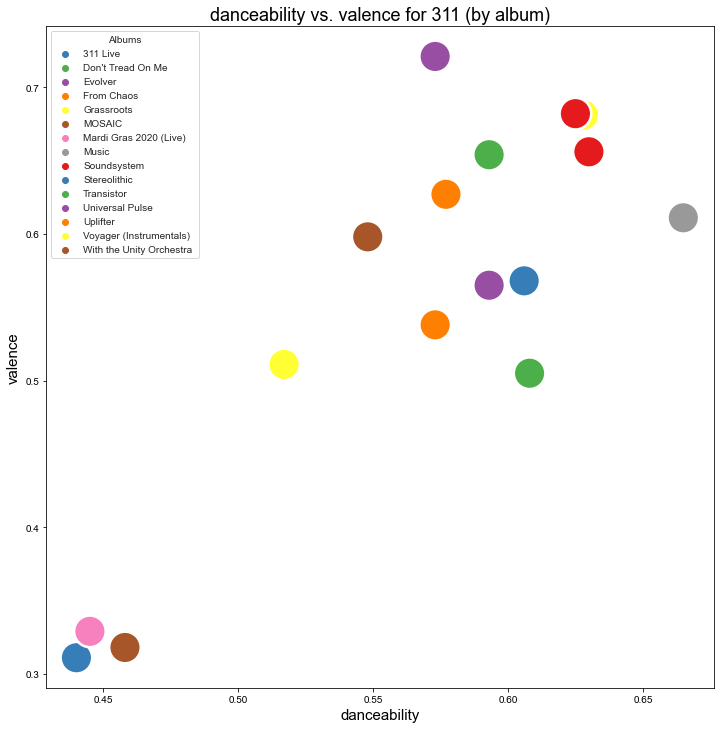

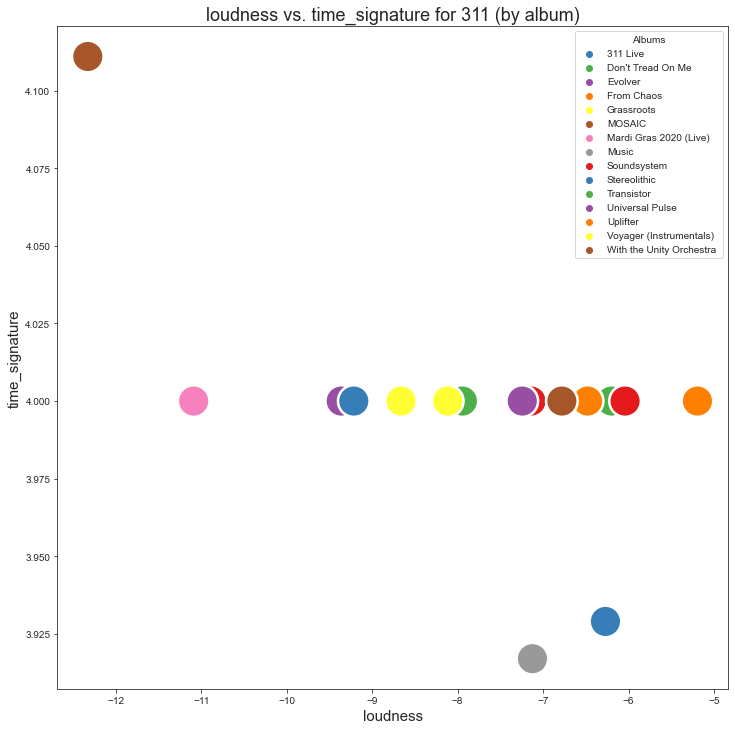

In [24]:
graphTopCorrs(top_5_corr, 0,1,0,1)
graphTopCorrs(bottom_5_corr, 0,1,0,1)